# Self-Driving Car Engineer Nanodegree


## Project: **Vehicle Detection and Tracking : Classifier** 

## Import Packages

In [1]:
#importing some useful packages
from glob import glob
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm, grid_search
import pickle

from helper_functions import get_hog_features, extract_features

%matplotlib inline

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Data Exploration

In [2]:
# Read both car and non-car images
car_images = glob('vehicles/*/*.png')
non_car_images = glob('non-vehicles/*/*.png')
print('Number of car images:', len(car_images))
print('Number of non-car images:', len(non_car_images))

Number of car images: 8792
Number of non-car images: 8968


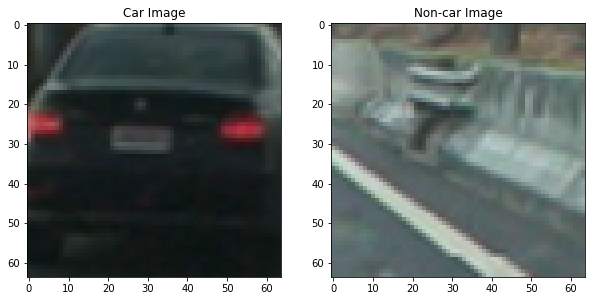

In [3]:
test_car_image_path = car_images[50]
test_non_car_image_path = non_car_images[5]
test_car_image = mpimg.imread(test_car_image_path)
test_non_car_image = mpimg.imread(test_non_car_image_path)
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(test_car_image)
plt.title('Car Image')
plt.subplot(1,2,2)
plt.imshow(test_non_car_image)
plt.title('Non-car Image')

## Visualize Color Space



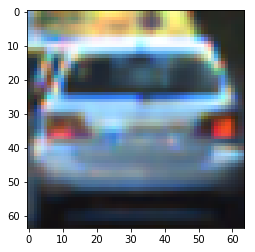

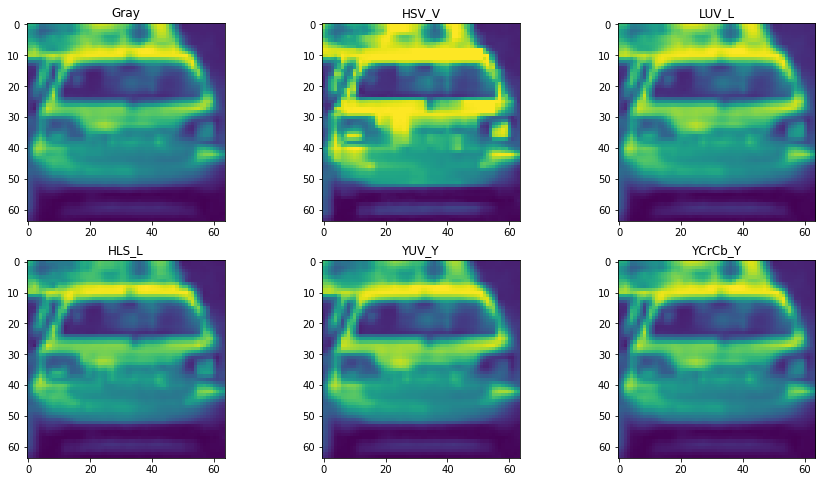

In [15]:
# Select a random car image 
random.seed(151)
random_index = int(random.random()*len(car_images))
random_car_image_path = car_images[random_index]
random_car_image = mpimg.imread(random_car_image_path)

# Convert to all color space
random_car_image_gray = cv2.cvtColor(random_car_image, cv2.COLOR_RGB2GRAY)
random_car_image_hsv = cv2.cvtColor(random_car_image, cv2.COLOR_RGB2HSV)
random_car_image_luv = cv2.cvtColor(random_car_image, cv2.COLOR_RGB2LUV)
random_car_image_hls = cv2.cvtColor(random_car_image, cv2.COLOR_RGB2HLS)
random_car_image_yuv = cv2.cvtColor(random_car_image, cv2.COLOR_RGB2YUV)
random_car_image_ycrcb = cv2.cvtColor(random_car_image, cv2.COLOR_RGB2YCrCb)

plt.imshow(random_car_image)

fig = plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.imshow(random_car_image_gray)
plt.title('Gray')
plt.subplot(2,3,2)
plt.imshow(random_car_image_hsv[:,:,2])
plt.title('HSV_V')
plt.subplot(2,3,3)
plt.imshow(random_car_image_luv[:,:,0])
plt.title('LUV_L')
plt.subplot(2,3,4)
plt.imshow(random_car_image_hls[:,:,1])
plt.title('HLS_L')
plt.subplot(2,3,5)
plt.imshow(random_car_image_yuv[:,:,0])
plt.title('YUV_Y')
plt.subplot(2,3,6)
plt.imshow(random_car_image_ycrcb[:,:,0])
plt.title('YCrCb_Y')

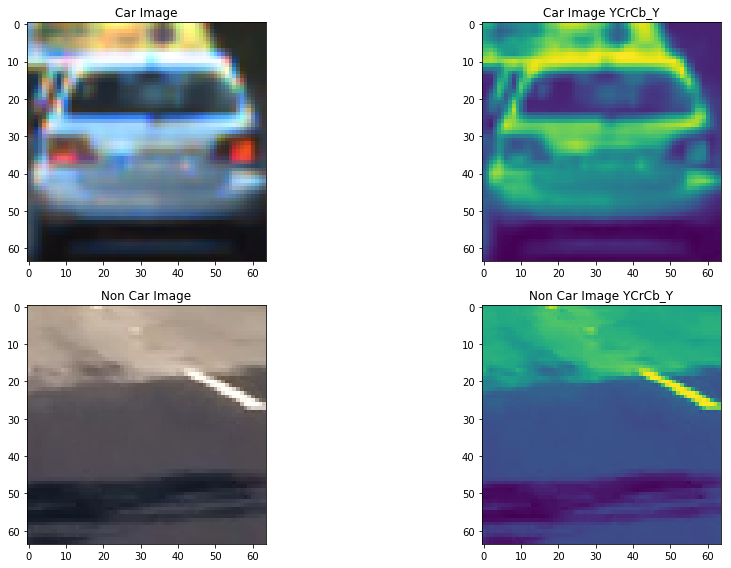

In [16]:
# Select a random non-car image
random_non_car_image_path = non_car_images[random_index]
random_non_car_image = mpimg.imread(random_non_car_image_path)
random_non_car_image_ycrcb = cv2.cvtColor(random_non_car_image, cv2.COLOR_RGB2YCrCb)

fig = plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
plt.imshow(random_car_image)
plt.title('Car Image')
plt.subplot(2,2,2)
plt.imshow(random_car_image_ycrcb[:,:,0])
plt.title('Car Image YCrCb_Y')
plt.subplot(2,2,3)
plt.imshow(random_non_car_image)
plt.title('Non Car Image')
plt.subplot(2,2,4)
plt.imshow(random_non_car_image_ycrcb[:,:,0])
plt.title('Non Car Image YCrCb_Y')
plt.tight_layout()

## Visualize Histogram of Oriented Gradient (HOG)



/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


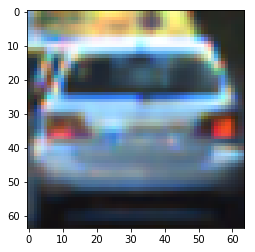

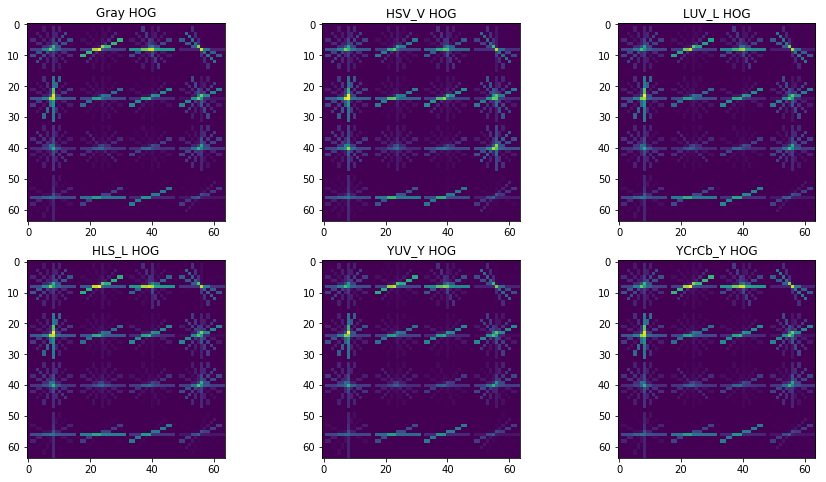

In [17]:
# Set HOG parameters
orient = 8
pix_per_cell = 16
cell_per_block = 2

# Get HOG features
features_random_car_image_gray, hog_random_car_image_gray = get_hog_features(random_car_image_gray, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
features_random_car_image_hsv_v, hog_random_car_image_hsv_v = get_hog_features(random_car_image_hsv[:,:,2], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
features_random_car_image_luv_l, hog_random_car_image_luv_l = get_hog_features(random_car_image_luv[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
features_random_car_image_hls_l, hog_random_car_image_hls_l = get_hog_features(random_car_image_hls[:,:,1], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
features_random_car_image_yuv_y, hog_random_car_image_yuv_y = get_hog_features(random_car_image_yuv[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
features_random_car_image_ycrcb_y, hog_random_car_image_ycrcb_y = get_hog_features(random_car_image_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

plt.imshow(random_car_image)

fig = plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.imshow(hog_random_car_image_gray)
plt.title('Gray HOG')
plt.subplot(2,3,2)
plt.imshow(hog_random_car_image_hsv_v)
plt.title('HSV_V HOG')
plt.subplot(2,3,3)
plt.imshow(hog_random_car_image_luv_l)
plt.title('LUV_L HOG')
plt.subplot(2,3,4)
plt.imshow(hog_random_car_image_hls_l)
plt.title('HLS_L HOG')
plt.subplot(2,3,5)
plt.imshow(hog_random_car_image_yuv_y)
plt.title('YUV_Y HOG')
plt.subplot(2,3,6)
plt.imshow(hog_random_car_image_ycrcb_y)
plt.title('YCrCb_Y HOG')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


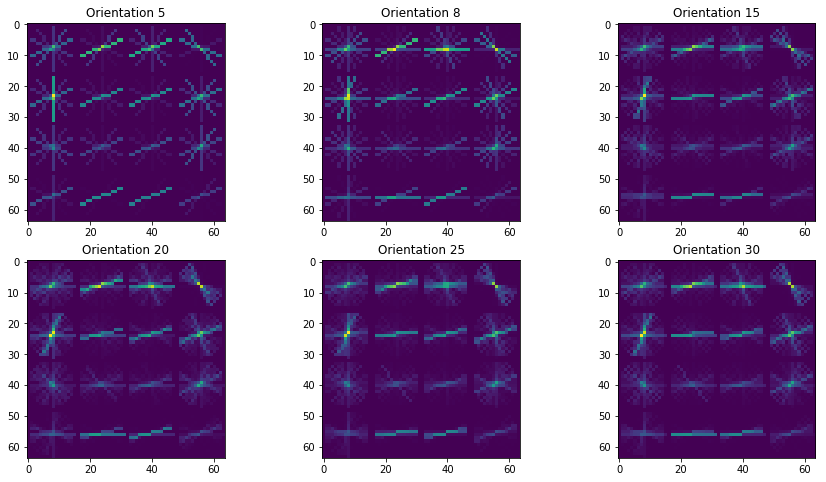

In [18]:
# Experiment with different orient
hog_feature_1, hog_image_1 = get_hog_features(random_car_image_ycrcb[:,:,0], 5, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog_feature_2, hog_image_2 = get_hog_features(random_car_image_ycrcb[:,:,0], 8, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog_feature_3, hog_image_3 = get_hog_features(random_car_image_ycrcb[:,:,0], 15, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog_feature_4, hog_image_4 = get_hog_features(random_car_image_ycrcb[:,:,0], 20, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog_feature_5, hog_image_5 = get_hog_features(random_car_image_ycrcb[:,:,0], 25, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
hog_feature_6, hog_image_6 = get_hog_features(random_car_image_ycrcb[:,:,0], 30, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

fig = plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.imshow(hog_image_1)
plt.title('Orientation 5')
plt.subplot(2,3,2)
plt.imshow(hog_image_2)
plt.title('Orientation 8')
plt.subplot(2,3,3)
plt.imshow(hog_image_3)
plt.title('Orientation 15')
plt.subplot(2,3,4)
plt.imshow(hog_image_4)
plt.title('Orientation 20')
plt.subplot(2,3,5)
plt.imshow(hog_image_5)
plt.title('Orientation 25')
plt.subplot(2,3,6)
plt.imshow(hog_image_6)
plt.title('Orientation 30')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


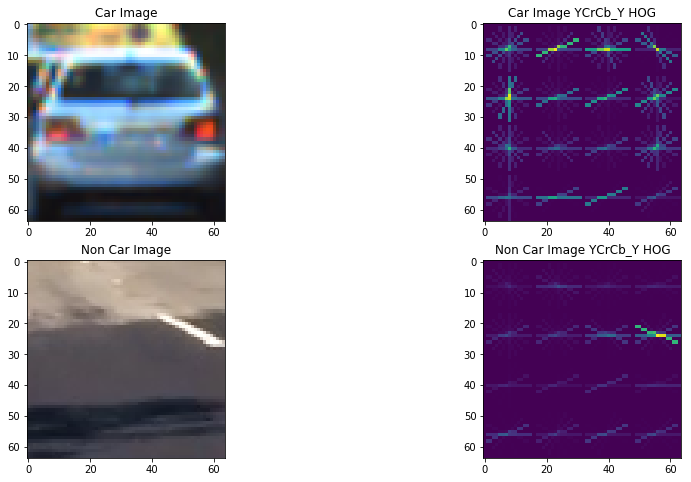

In [19]:
features_random_non_car_image_ycrcb_y, hog_random_non_car_image_ycrcb_y = get_hog_features(random_non_car_image_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

fig = plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
plt.imshow(random_car_image)
plt.title('Car Image')
plt.subplot(2,2,2)
plt.imshow(hog_random_car_image_ycrcb_y)
plt.title('Car Image YCrCb_Y HOG')
plt.subplot(2,2,3)
plt.imshow(random_non_car_image)
plt.title('Non Car Image')
plt.subplot(2,2,4)
plt.imshow(hog_random_non_car_image_ycrcb_y)
plt.title('Non Car Image YCrCb_Y HOG')

## Extracting Features



In [10]:
color_space = 'YCrCb'
spatial_size = (32, 32)
orient = 8
pix_per_cell = 16
cell_per_block = 2
hog_channel = 0

t=time.time()
car_features = extract_features(car_images, cspace=color_space, spatial_size=spatial_size, 
                                orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel = hog_channel)

non_car_features = extract_features(non_car_images, cspace=color_space, spatial_size=spatial_size, 
                                orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel = hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract features...')

print('Using spatial binning of:',spatial_size[0])
print('Using:', orient, 'orientations', pix_per_cell, 'pixels per cell and', cell_per_block, 'cells per block.')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


31.39 Seconds to extract features...
Using spatial binning of: 32
Using: 8 orientations 16 pixels per cell and 2 cells per block.


## Splitting Data Into Training And Testing Set



In [11]:
# Create an array stack, NOTE: StandardScaler() expects np.float64
X = np.vstack((car_features, non_car_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Create labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))
# Split up data into training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)


print('Feature vector length:', len(X_train[0]))

Feature vector length: 3360


## Classifier Parameter Tuning


In [ ]:
t=time.time()
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 5, 10, 15]}
svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to tune the parameters...')
print(clf.best_params_)
print(clf.grid_scores_)

## Best Classifier


In [12]:
t=time.time()
clf = svm.SVC(C = 5, kernel = 'rbf')
clf.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train the best classifier...')

137.06 Seconds to train the best classifier...


## Classifier Score


In [13]:
t=time.time()
# Check the score of the SVC
print('Test Accuracy of SVC = ', clf.score(X_test, y_test))
t2 = time.time()
print(round(t2-t, 5), 'seconds to compute the test accuracy.')

Test Accuracy of SVC =  0.994369369369
32.81593 seconds to compute the test accuracy.


## Save Classifier Parameters


In [14]:
classifier_params={
    'svc': clf,
    'X_scaler': X_scaler,
    'color_space': color_space,
    'orient': orient,
    'pix_per_cell': pix_per_cell,
    'cell_per_block': cell_per_block,
    'spatial_size' : spatial_size
     }

pickle.dump(classifier_params, open("classifier_params.pkl", "wb"))